In [1]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path("..").resolve()
sys.path.append(str(project_root))

import numpy as np
import matplotlib.pyplot as plt
from experiments.datasets import make_double_linear
from experiments.datasets import plot_data

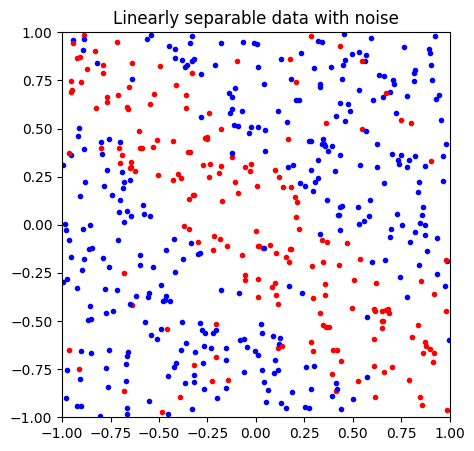

In [7]:
X_states, y_labels = make_double_linear(p=500, noise_rate=0.1)

plot_title = "Linearly separable data with noise"
plot_data(X_states, y_labels, plot_title)